# Breast Cancer Prediction using Machine Learning

This comprehensive machine learning project focuses on predicting breast cancer diagnosis using the Wisconsin Breast Cancer dataset. We'll implement multiple algorithms, perform thorough feature analysis, and compare different approaches to build an optimal classification model.

## Project Overview
- **Dataset**: Wisconsin Breast Cancer Dataset
- **Objective**: Classify tumors as malignant or benign
- **Approach**: Multiple ML algorithms with comprehensive evaluation
- **Tools**: Python, scikit-learn, pandas, matplotlib, seaborn

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Data Loading and Initial Exploration

Let's start by loading the breast cancer dataset and examining its structure, checking for missing values, and understanding the distribution of target classes.

In [68]:
# Load the breast cancer dataset
data = "data\data.csv"
X = pd.read_csv(data)

# Create a complete dataframe
df = X.copy()


print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(X.columns)}")


Dataset Shape: (569, 33)

Dataset Info:
Number of samples: 569
Number of features: 33


In [9]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [10]:
# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

# Basic statistics
print("\nBasic Statistics:")
df.describe()

Missing values per column:
No missing values found!

Basic Statistics:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Target Distribution:
diagnosis
benign       357
malignant    212
Name: count, dtype: int64

Percentages:
diagnosis
benign       62.741652
malignant    37.258348
Name: count, dtype: float64


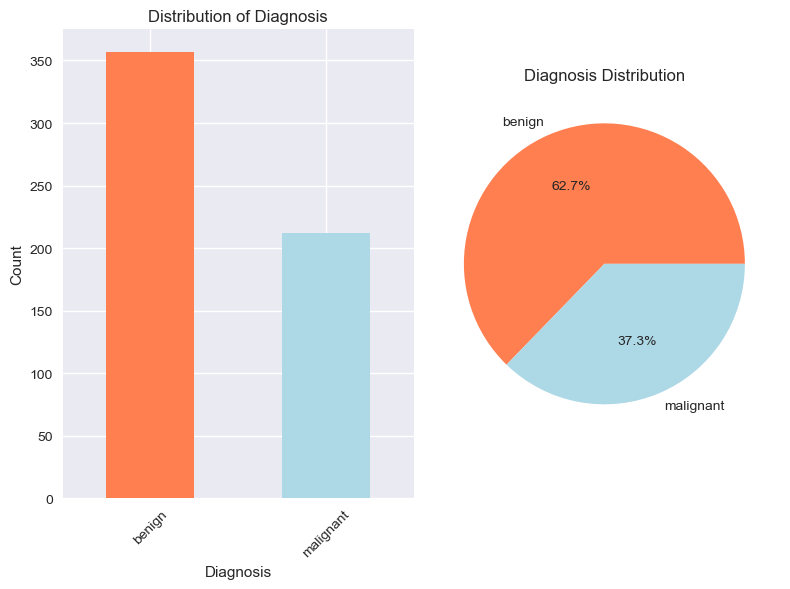

In [13]:
# Target distribution
print("Target Distribution:")
target_counts = df['diagnosis'].value_counts()
print(target_counts)
print(f"\nPercentages:")
print(target_counts / len(df) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color=['coral', 'lightblue'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', colors=['coral', 'lightblue'])
plt.title('Diagnosis Distribution')

plt.tight_layout()
plt.show()

## 2. Exploratory Data Analysis and Visualization

Now let's create comprehensive visualizations to understand feature relationships and identify patterns between malignant and benign cases.

In [14]:
# Feature categories analysis
feature_categories = {
    'mean': [col for col in X.columns if 'mean' in col],
    'se': [col for col in X.columns if 'se' in col],
    'worst': [col for col in X.columns if 'worst' in col]
}

print("Feature Categories:")
for category, features in feature_categories.items():
    print(f"{category.upper()}: {len(features)} features")
    print(features[:3], "..." if len(features) > 3 else "")
    print()

Feature Categories:
MEAN: 10 features
['mean radius', 'mean texture', 'mean perimeter'] ...

SE: 0 features
[] 

WORST: 10 features
['worst radius', 'worst texture', 'worst perimeter'] ...



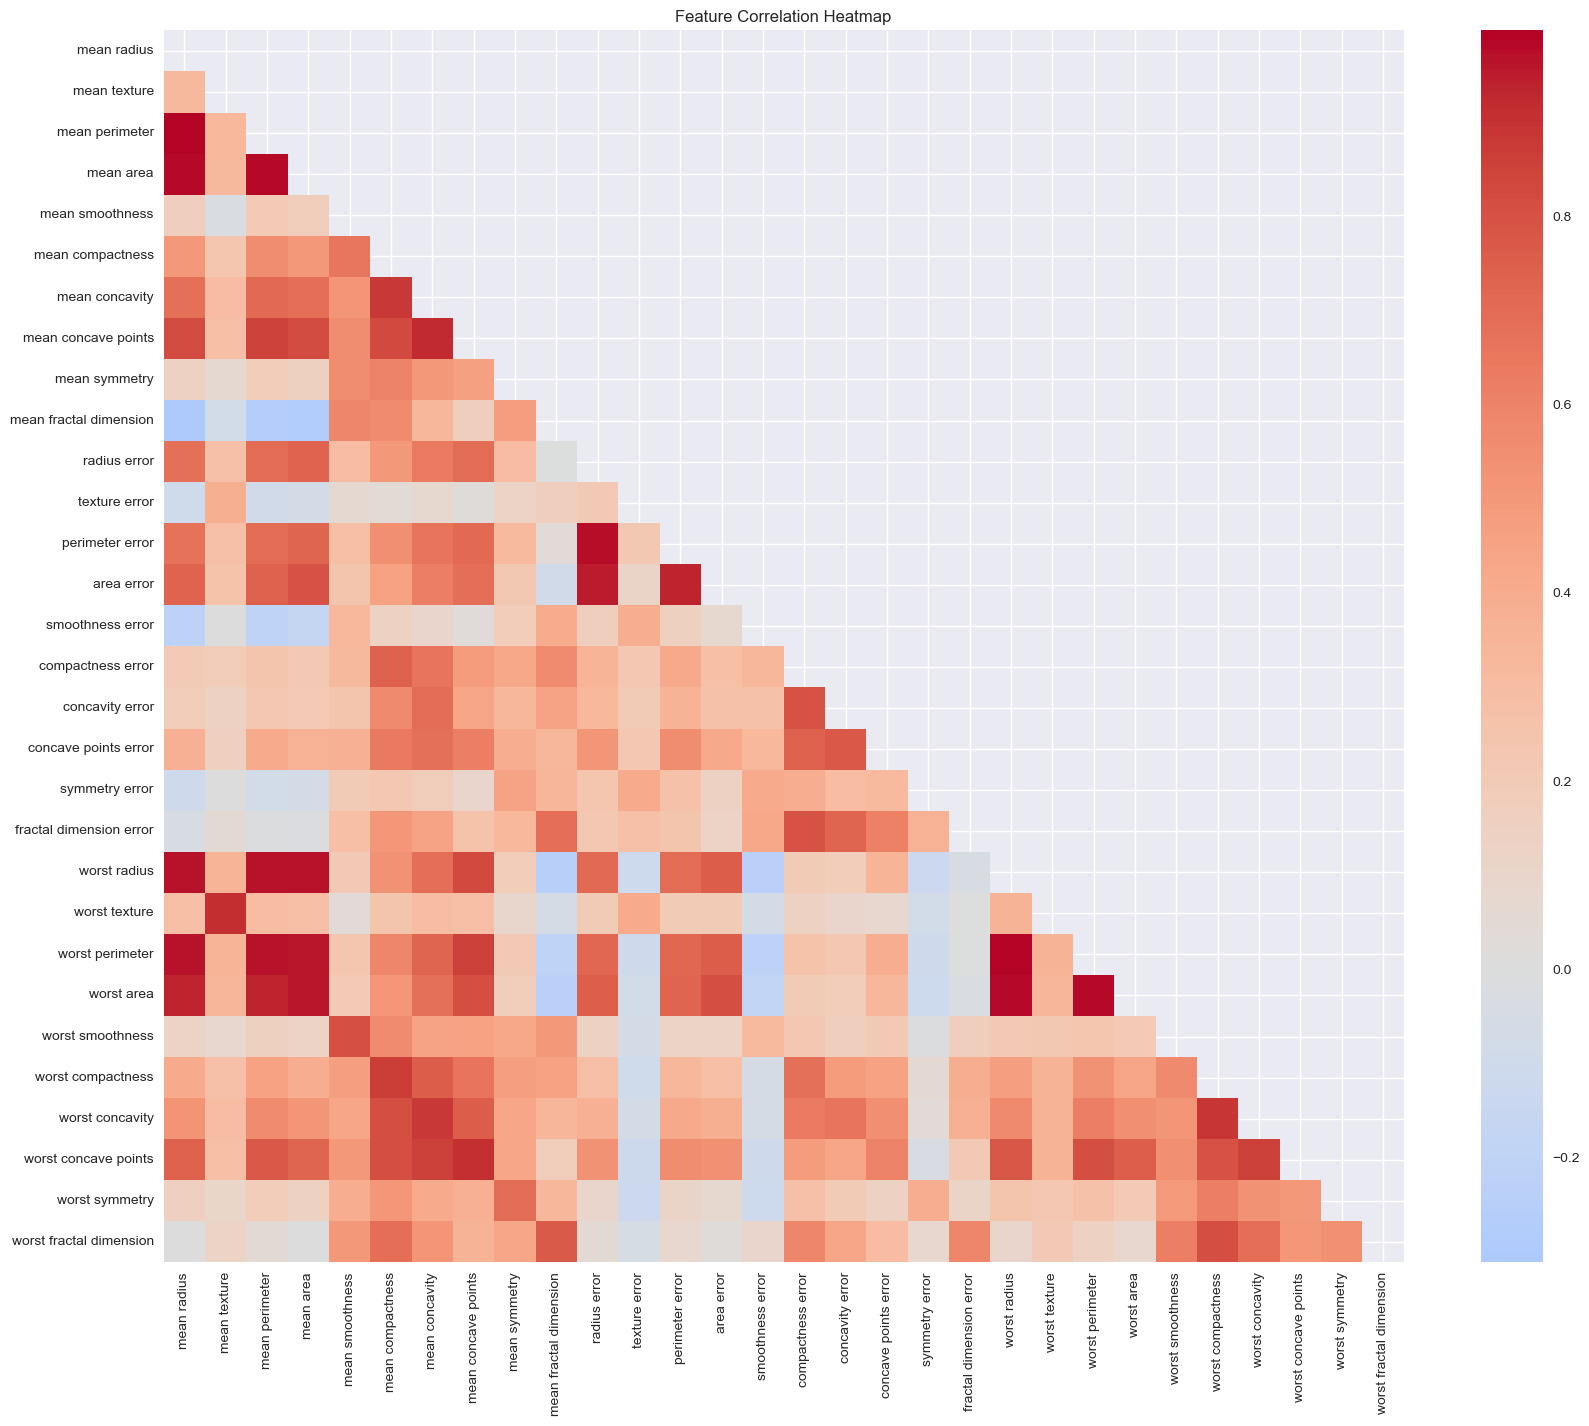

In [15]:
# Correlation heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = X.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

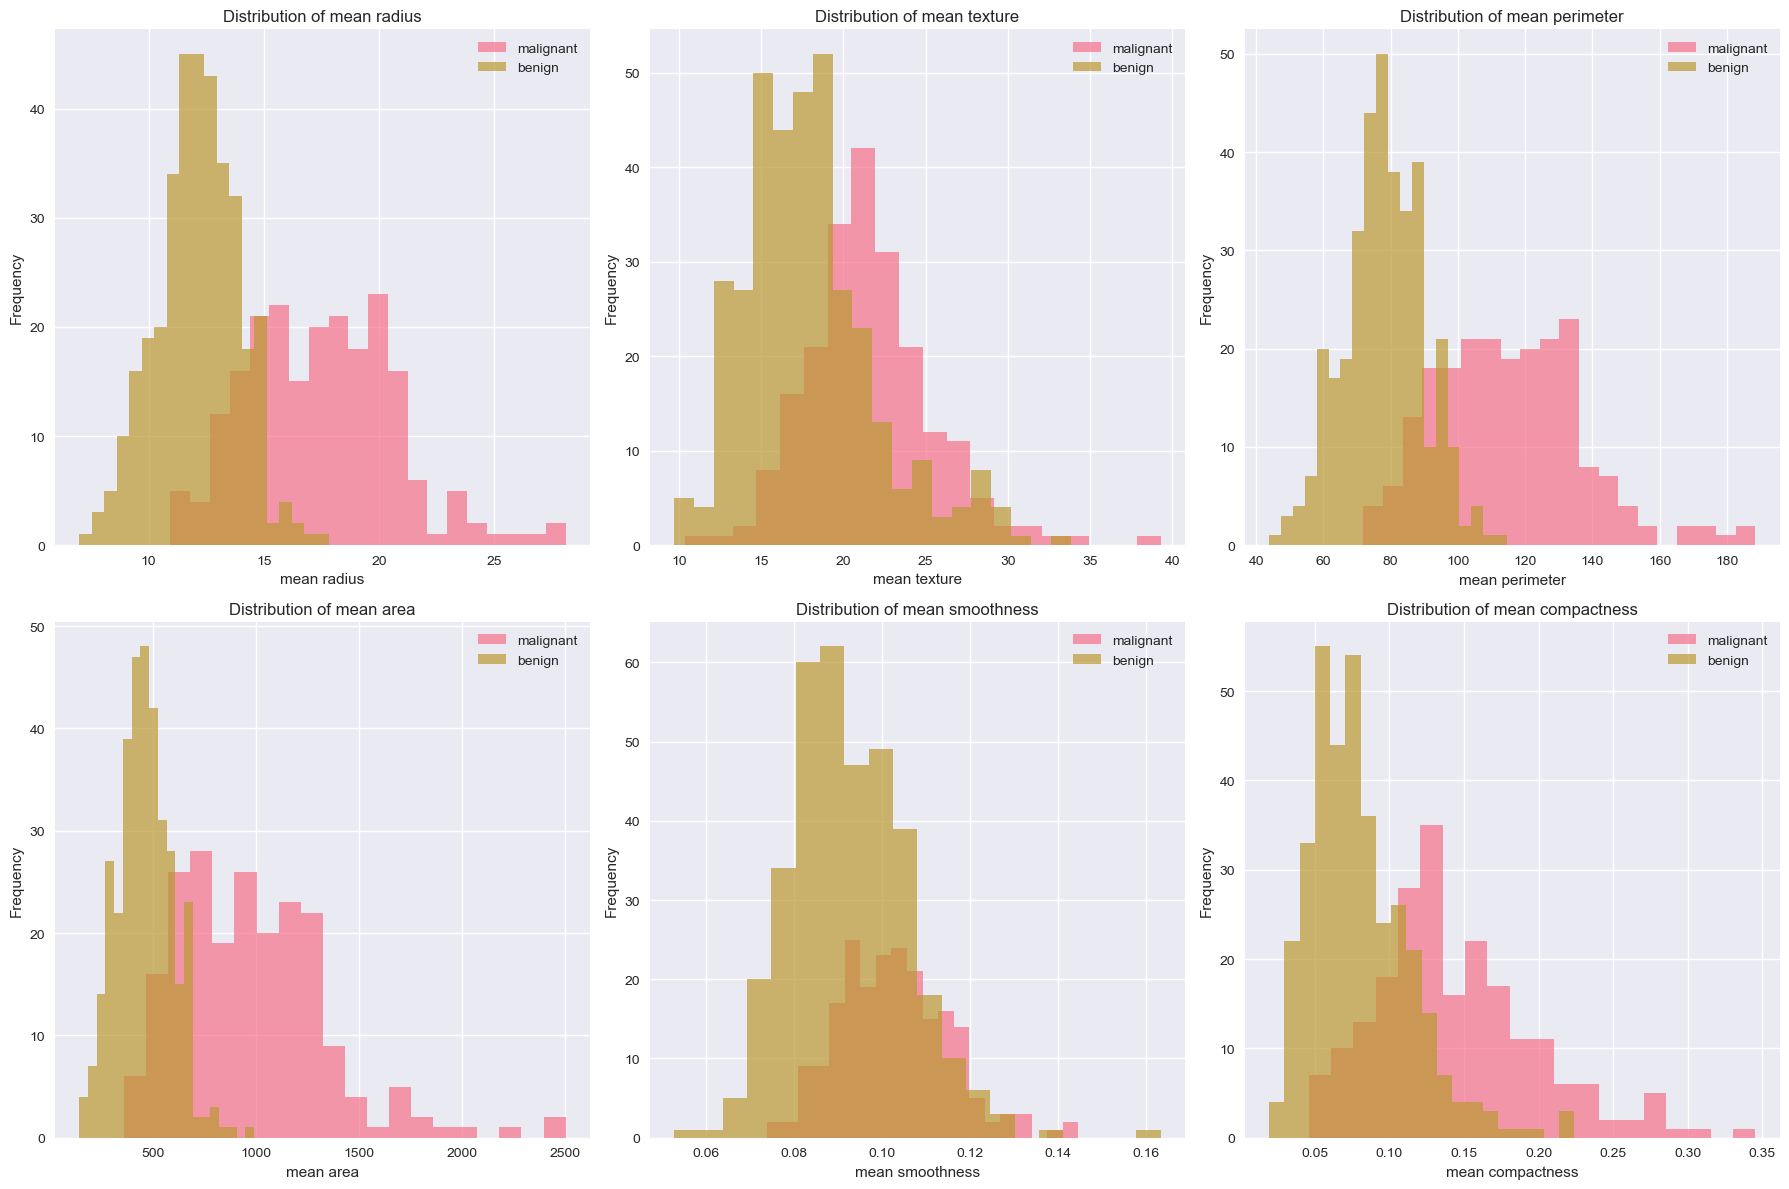

In [16]:
# Distribution plots for key features
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    for diagnosis in df['diagnosis'].unique():
        subset = df[df['diagnosis'] == diagnosis][feature]
        axes[i].hist(subset, alpha=0.7, label=diagnosis, bins=20)
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

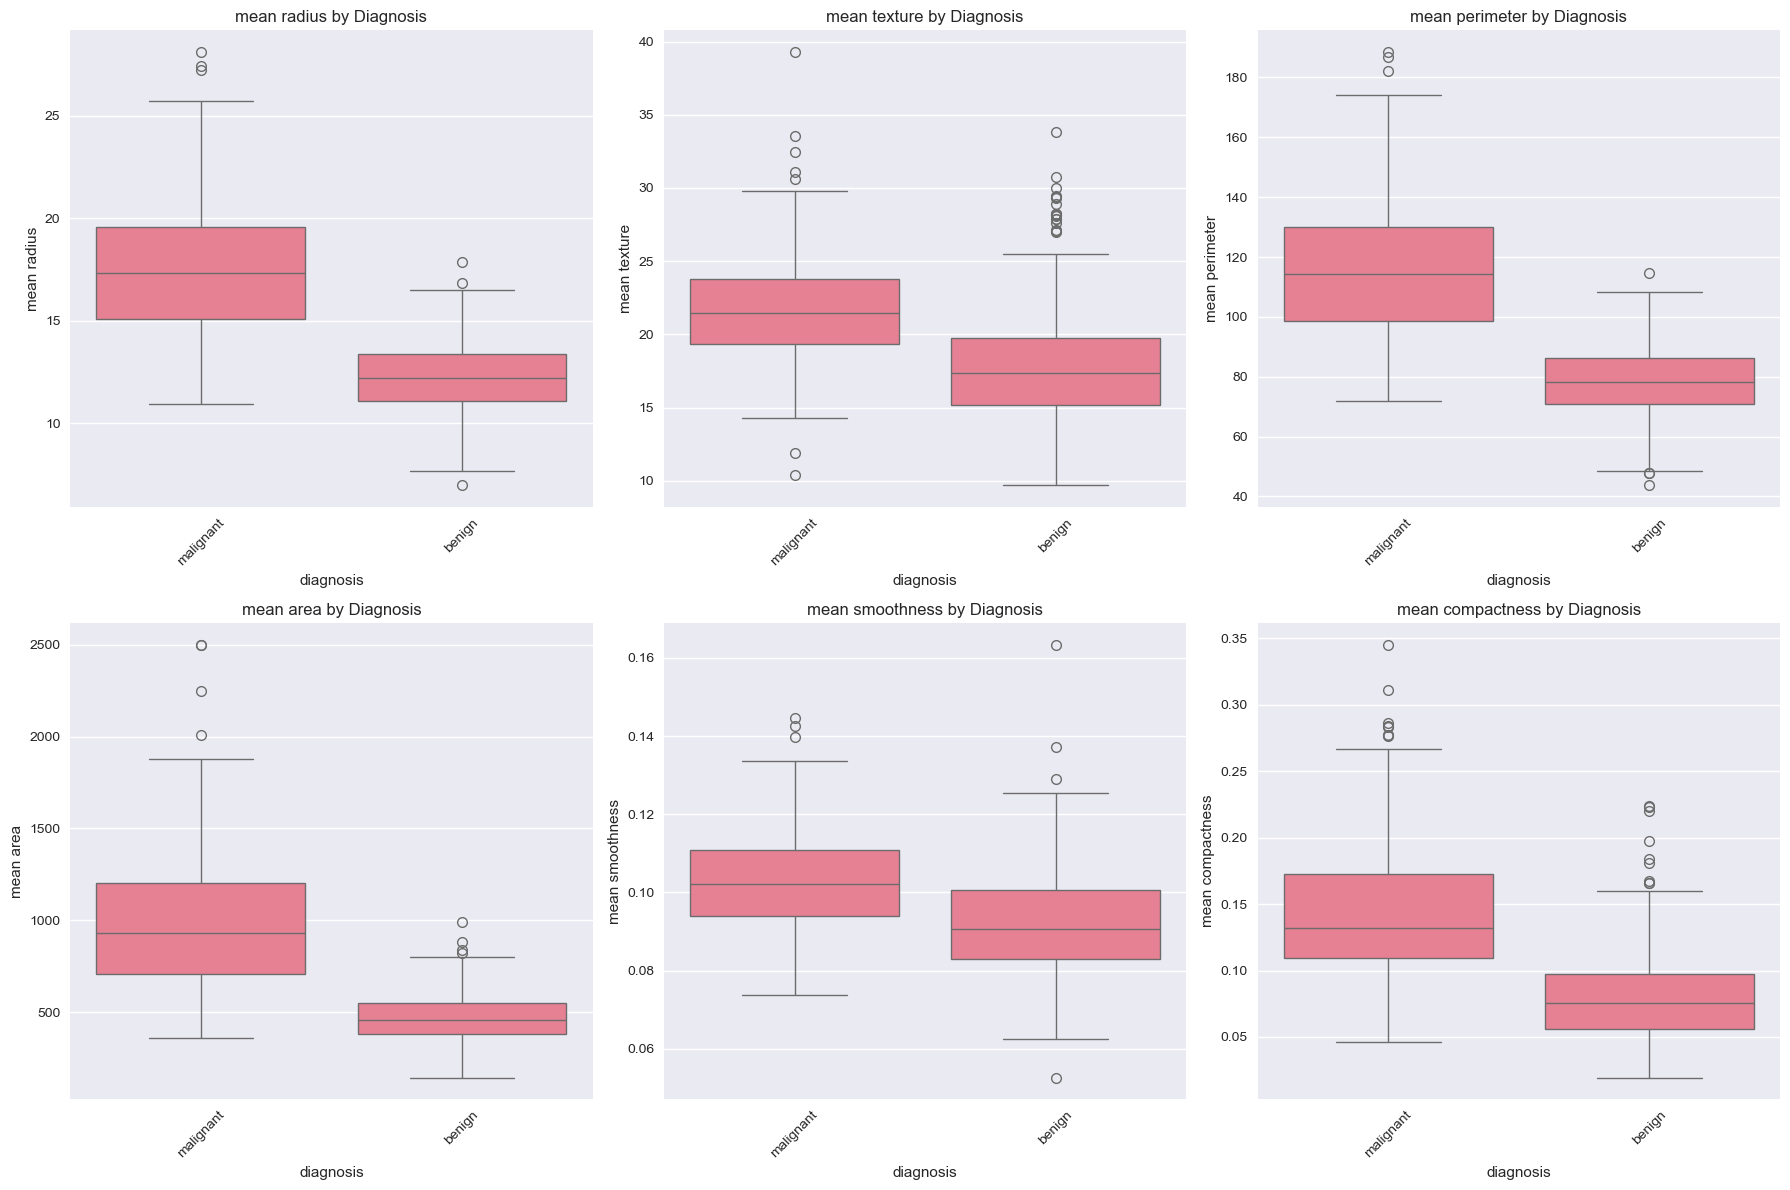

In [17]:
# Box plots for comparison between malignant and benign
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    sns.boxplot(data=df, x='diagnosis', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Diagnosis')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

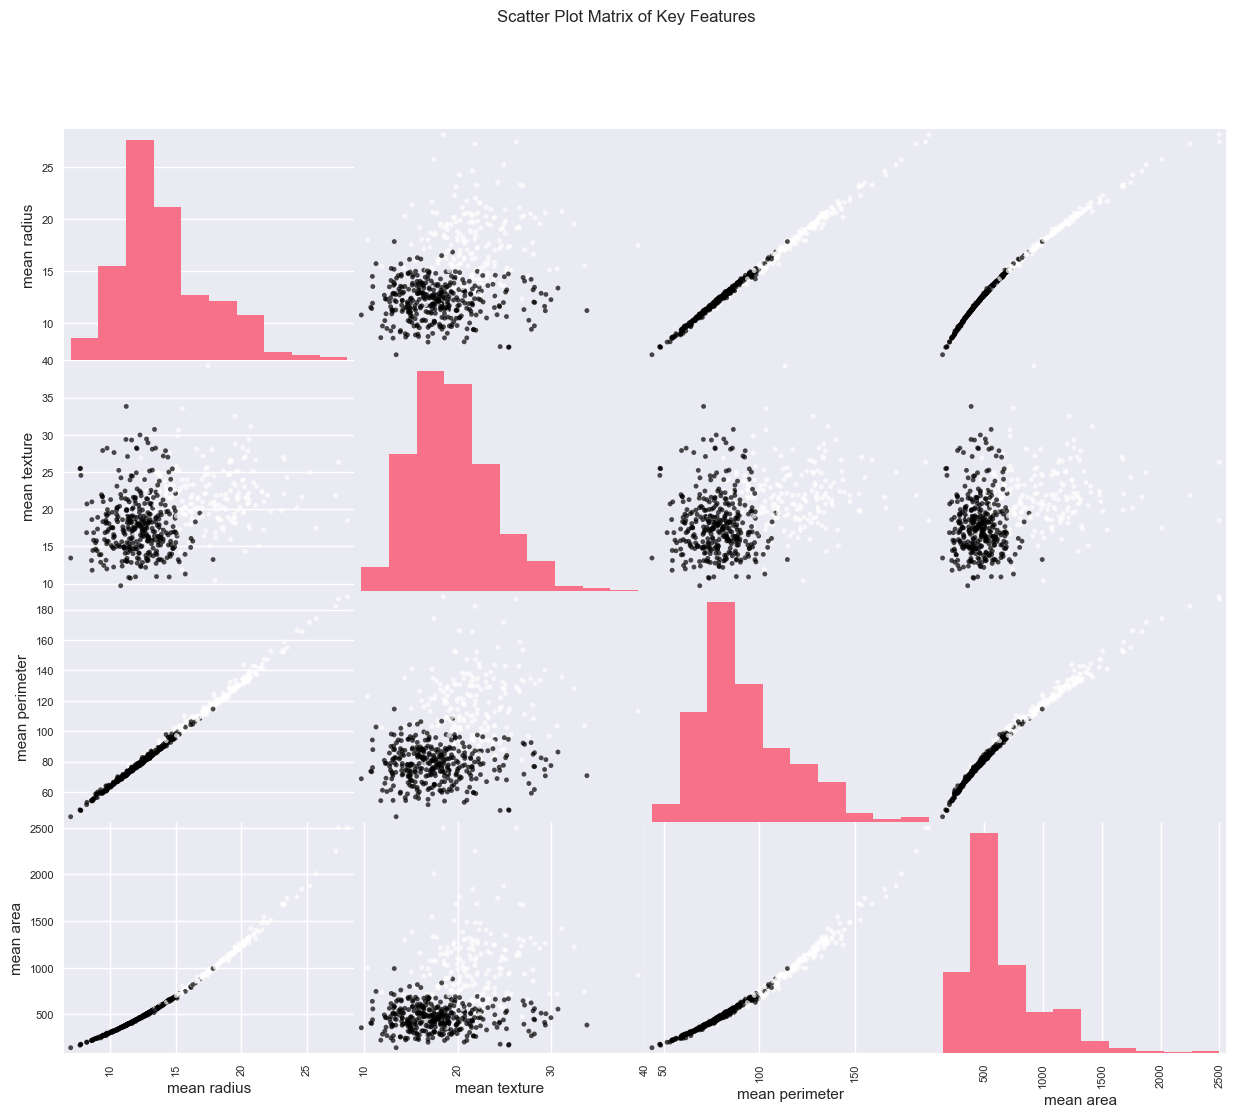

In [18]:
# Scatter plot matrix for selected features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
scatter_df = df[selected_features + ['diagnosis']].copy()

plt.figure(figsize=(15, 12))
pd.plotting.scatter_matrix(scatter_df[selected_features], 
                          c=df['target'], 
                          figsize=(15, 12), 
                          alpha=0.7,
                          diagonal='hist')
plt.suptitle('Scatter Plot Matrix of Key Features')
plt.show()

## 3. Data Preprocessing and Feature Engineering

Let's handle data cleaning, feature scaling, and create engineered features to improve model performance.

In [19]:
# Prepare features and target
X_processed = X.copy()
y_processed = y.copy()

print("Original feature shape:", X_processed.shape)
print("Target shape:", y_processed.shape)

# Check data types
print("\nData types:")
print(X_processed.dtypes.value_counts())

Original feature shape: (569, 30)
Target shape: (569,)

Data types:
float64    30
Name: count, dtype: int64


In [20]:
# Feature engineering - create ratio features
X_processed['radius_texture_ratio'] = X_processed['mean radius'] / X_processed['mean texture']
X_processed['area_perimeter_ratio'] = X_processed['mean area'] / X_processed['mean perimeter']
X_processed['compactness_smoothness_ratio'] = X_processed['mean compactness'] / X_processed['mean smoothness']

# Create polynomial features for key variables
X_processed['radius_squared'] = X_processed['mean radius'] ** 2
X_processed['area_sqrt'] = np.sqrt(X_processed['mean area'])

print("Feature engineering completed.")
print("New feature shape:", X_processed.shape)
print("New features added:", ['radius_texture_ratio', 'area_perimeter_ratio', 'compactness_smoothness_ratio', 'radius_squared', 'area_sqrt'])

Feature engineering completed.
New feature shape: (569, 35)
New features added: ['radius_texture_ratio', 'area_perimeter_ratio', 'compactness_smoothness_ratio', 'radius_squared', 'area_sqrt']


In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y_processed)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target distribution:")
print(pd.Series(y_train).value_counts())

Training set shape: (455, 35)
Test set shape: (114, 35)
Training target distribution:
target
1    285
0    170
Name: count, dtype: int64


In [22]:
# Feature scaling
# StandardScaler
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Convert back to DataFrames for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed using StandardScaler and MinMaxScaler")
print("Scaled training set shape:", X_train_scaled_df.shape)

Feature scaling completed using StandardScaler and MinMaxScaler
Scaled training set shape: (455, 35)


## 4. Feature Selection and Analysis

Let's implement multiple feature selection techniques to identify the most predictive features.

In [23]:
# Correlation with target
feature_target_corr = pd.DataFrame({
    'feature': X_train.columns,
    'correlation': [np.corrcoef(X_train[col], y_train)[0,1] for col in X_train.columns]
})
feature_target_corr['abs_correlation'] = abs(feature_target_corr['correlation'])
feature_target_corr = feature_target_corr.sort_values('abs_correlation', ascending=False)

print("Top 15 features by correlation with target:")
print(feature_target_corr.head(15))

Top 15 features by correlation with target:
                 feature  correlation  abs_correlation
27  worst concave points    -0.798176         0.798176
22       worst perimeter    -0.783376         0.783376
7    mean concave points    -0.779907         0.779907
20          worst radius    -0.776390         0.776390
2         mean perimeter    -0.745132         0.745132
23            worst area    -0.737965         0.737965
34             area_sqrt    -0.733821         0.733821
0            mean radius    -0.732224         0.732224
31  area_perimeter_ratio    -0.716284         0.716284
3              mean area    -0.713409         0.713409
33        radius_squared    -0.711031         0.711031
6         mean concavity    -0.692052         0.692052
26       worst concavity    -0.668368         0.668368
5       mean compactness    -0.610722         0.610722
25     worst compactness    -0.602331         0.602331


In [24]:
# Univariate feature selection
selector_univariate = SelectKBest(score_func=f_classif, k=20)
X_train_univariate = selector_univariate.fit_transform(X_train_scaled, y_train)
X_test_univariate = selector_univariate.transform(X_test_scaled)

# Get selected feature names
selected_features_univariate = X_train.columns[selector_univariate.get_support()]
print("Features selected by univariate selection:")
print(list(selected_features_univariate))

Features selected by univariate selection:
['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points', 'area_perimeter_ratio', 'compactness_smoothness_ratio', 'radius_squared', 'area_sqrt']


In [25]:
# Recursive Feature Elimination with Random Forest
rf_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector_rfe = RFE(estimator=rf_estimator, n_features_to_select=15)
X_train_rfe = selector_rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector_rfe.transform(X_test_scaled)

# Get selected feature names
selected_features_rfe = X_train.columns[selector_rfe.get_support()]
print("Features selected by RFE:")
print(list(selected_features_rfe))

Features selected by RFE:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry']


Top 15 features by Random Forest importance:
                 feature  importance
22       worst perimeter    0.115778
27  worst concave points    0.106777
7    mean concave points    0.104952
23            worst area    0.080094
20          worst radius    0.068490
2         mean perimeter    0.059718
34             area_sqrt    0.059339
0            mean radius    0.050405
6         mean concavity    0.046572
13            area error    0.037688
26       worst concavity    0.037545
33        radius_squared    0.031914
31  area_perimeter_ratio    0.025841
3              mean area    0.020150
25     worst compactness    0.015978


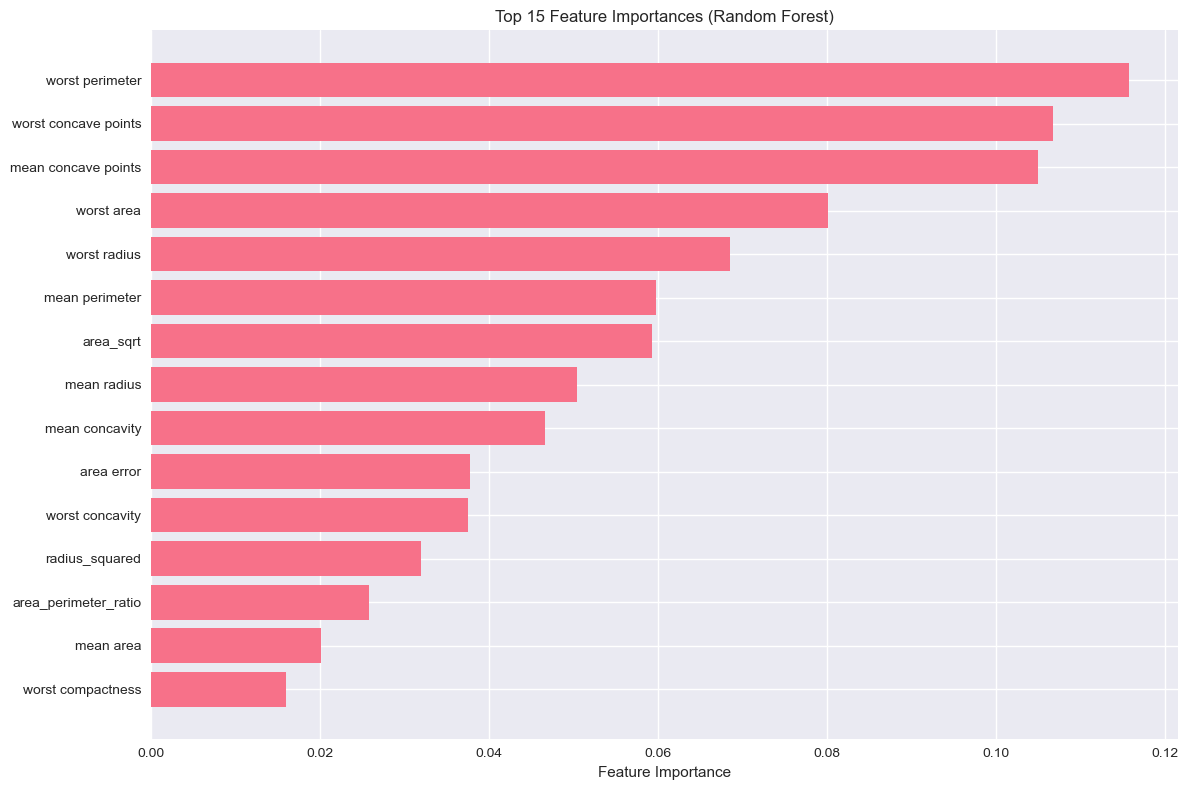

In [26]:
# Feature importance from Random Forest
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_importance.fit(X_train_scaled, y_train)

feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_importance.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 features by Random Forest importance:")
print(feature_importance_df.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5. Model Implementation and Training

Now let's implement and train multiple machine learning algorithms to compare their performance.

In [27]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

print("Models initialized:")
for name in models.keys():
    print(f"- {name}")

Models initialized:
- Logistic Regression
- Random Forest
- SVM
- K-Nearest Neighbors
- Gradient Boosting
- Neural Network


In [28]:
# Train models and store results
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Store results
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

print("\nAll models trained successfully!")


Training Logistic Regression...
Accuracy: 0.9737
CV Score: 0.9824 (+/- 0.0264)

Training Random Forest...
Accuracy: 0.9474
CV Score: 0.9560 (+/- 0.0440)

Training SVM...
Accuracy: 0.9737
CV Score: 0.9714 (+/- 0.0357)

Training K-Nearest Neighbors...
Accuracy: 0.9649
CV Score: 0.9692 (+/- 0.0378)

Training Gradient Boosting...
Accuracy: 0.9561
CV Score: 0.9626 (+/- 0.0224)

Training Neural Network...
Accuracy: 0.9737
CV Score: 0.9780 (+/- 0.0461)

All models trained successfully!


## 6. Model Comparison and Evaluation

Let's evaluate all models using various metrics and visualization techniques.

In [29]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [results['accuracy'] for results in model_results.values()],
    'Precision': [results['precision'] for results in model_results.values()],
    'Recall': [results['recall'] for results in model_results.values()],
    'F1-Score': [results['f1_score'] for results in model_results.values()],
    'CV Mean': [results['cv_mean'] for results in model_results.values()],
    'CV Std': [results['cv_std'] for results in model_results.values()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print("Model Performance Comparison:")
print(comparison_df.round(4))

Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score  CV Mean  CV Std
0  Logistic Regression    0.9737     0.9859  0.9722    0.9790   0.9824  0.0132
2                  SVM    0.9737     0.9859  0.9722    0.9790   0.9714  0.0179
5       Neural Network    0.9737     0.9859  0.9722    0.9790   0.9780  0.0231
3  K-Nearest Neighbors    0.9649     0.9595  0.9861    0.9726   0.9692  0.0189
4    Gradient Boosting    0.9561     0.9467  0.9861    0.9660   0.9626  0.0112
1        Random Forest    0.9474     0.9583  0.9583    0.9583   0.9560  0.0220


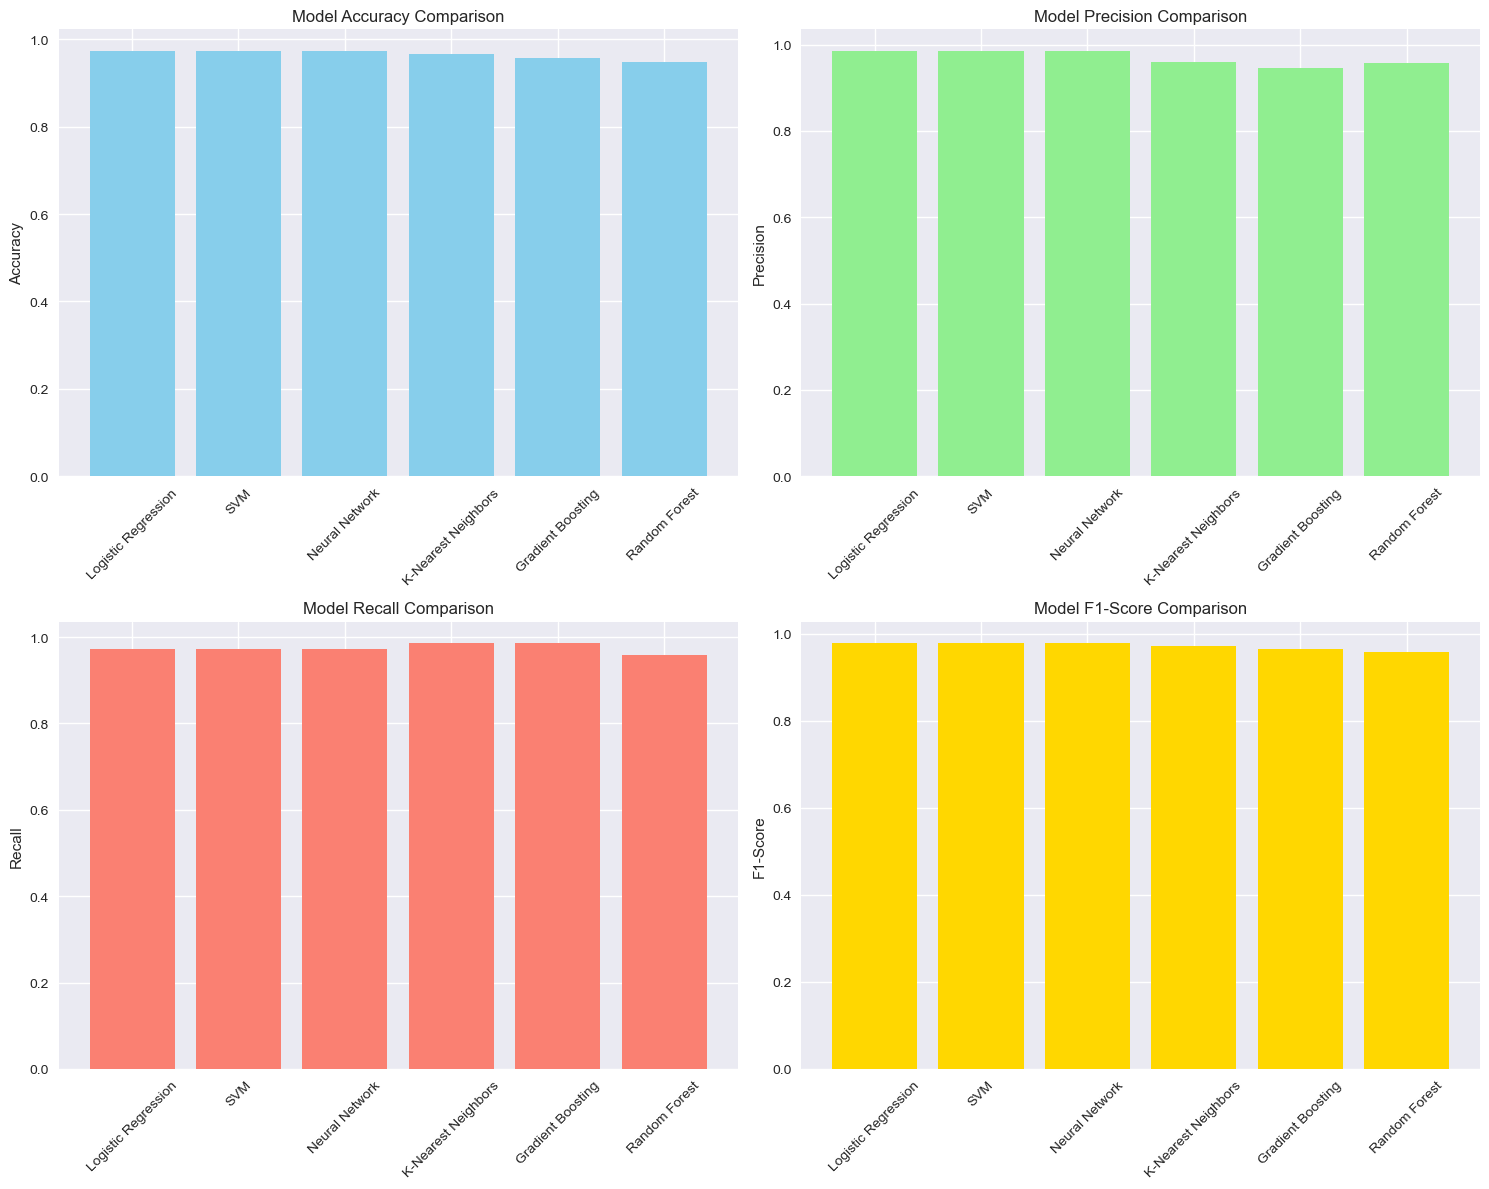

In [30]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0,0].bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# Precision comparison
axes[0,1].bar(comparison_df['Model'], comparison_df['Precision'], color='lightgreen')
axes[0,1].set_title('Model Precision Comparison')
axes[0,1].set_ylabel('Precision')
axes[0,1].tick_params(axis='x', rotation=45)

# Recall comparison
axes[1,0].bar(comparison_df['Model'], comparison_df['Recall'], color='salmon')
axes[1,0].set_title('Model Recall Comparison')
axes[1,0].set_ylabel('Recall')
axes[1,0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[1,1].bar(comparison_df['Model'], comparison_df['F1-Score'], color='gold')
axes[1,1].set_title('Model F1-Score Comparison')
axes[1,1].set_ylabel('F1-Score')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

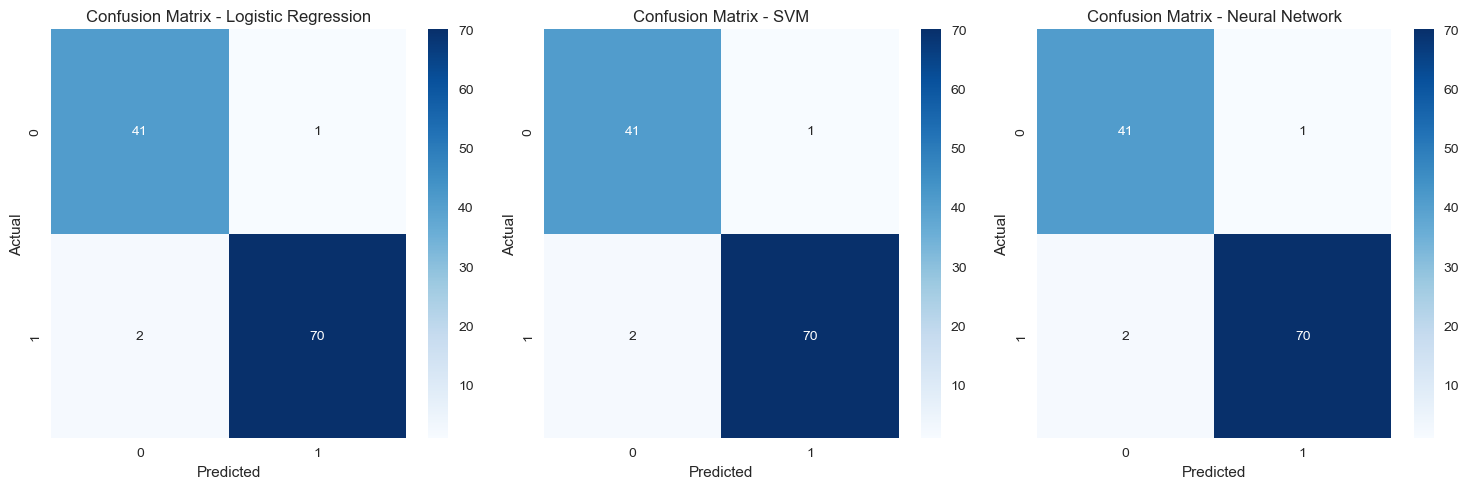

In [31]:
# Confusion matrices for top 3 models
top_3_models = comparison_df.head(3)['Model'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, model_name in enumerate(top_3_models):
    y_pred = model_results[model_name]['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

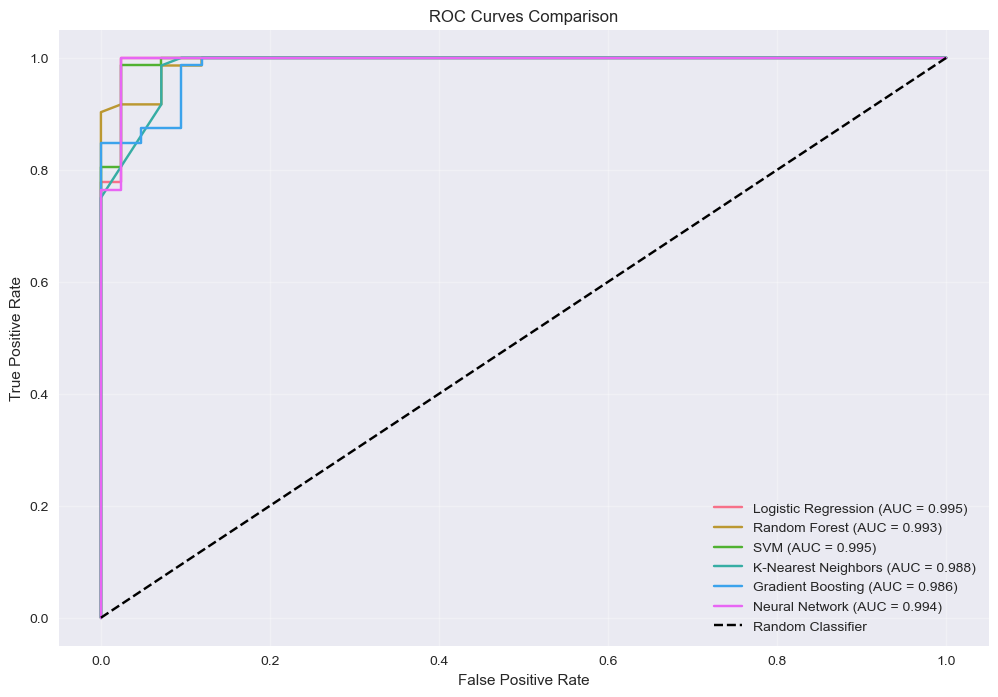

In [32]:
# ROC Curves
plt.figure(figsize=(12, 8))

for name, results in model_results.items():
    if results['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 7. Hyperparameter Optimization

Let's optimize hyperparameters for the best performing models to improve their accuracy.

In [33]:
# Get the best performing model for optimization
best_model_name = comparison_df.iloc[0]['Model']
print(f"Best performing model: {best_model_name}")
print(f"Current accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")

Best performing model: Logistic Regression
Current accuracy: 0.9737


In [34]:
# Hyperparameter optimization for Random Forest
if best_model_name == 'Random Forest':
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    grid_search_rf = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid_rf,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    print("Optimizing Random Forest hyperparameters...")
    grid_search_rf.fit(X_train_scaled, y_train)
    
    print("Best parameters:", grid_search_rf.best_params_)
    print("Best cross-validation score:", grid_search_rf.best_score_)
    
    # Evaluate optimized model
    best_rf = grid_search_rf.best_estimator_
    y_pred_optimized = best_rf.predict(X_test_scaled)
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
    print(f"Optimized model accuracy: {accuracy_optimized:.4f}")

In [35]:
# Hyperparameter optimization for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Use RandomizedSearchCV for faster optimization
random_search_svm = RandomizedSearchCV(
    SVC(random_state=42, probability=True),
    param_grid_svm,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Optimizing SVM hyperparameters...")
random_search_svm.fit(X_train_scaled, y_train)

print("Best parameters:", random_search_svm.best_params_)
print("Best cross-validation score:", random_search_svm.best_score_)

# Evaluate optimized SVM
best_svm = random_search_svm.best_estimator_
y_pred_svm_optimized = best_svm.predict(X_test_scaled)
accuracy_svm_optimized = accuracy_score(y_test, y_pred_svm_optimized)
print(f"Optimized SVM accuracy: {accuracy_svm_optimized:.4f}")

Optimizing SVM hyperparameters...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
Best cross-validation score: 0.9802197802197803
Optimized SVM accuracy: 0.9649


In [36]:
# Hyperparameter optimization for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Optimizing Logistic Regression hyperparameters...")
grid_search_lr.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search_lr.best_params_)
print("Best cross-validation score:", grid_search_lr.best_score_)

# Evaluate optimized Logistic Regression
best_lr = grid_search_lr.best_estimator_
y_pred_lr_optimized = best_lr.predict(X_test_scaled)
accuracy_lr_optimized = accuracy_score(y_test, y_pred_lr_optimized)
print(f"Optimized Logistic Regression accuracy: {accuracy_lr_optimized:.4f}")

Optimizing Logistic Regression hyperparameters...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.9846153846153847
Optimized Logistic Regression accuracy: 0.9737


## 8. Final Model Selection and Performance Analysis

Let's select the best model and provide detailed analysis with clinical relevance.

In [37]:
# Compare optimized models
optimized_results = {
    'Random Forest (Optimized)': accuracy_optimized if 'accuracy_optimized' in locals() else 0,
    'SVM (Optimized)': accuracy_svm_optimized,
    'Logistic Regression (Optimized)': accuracy_lr_optimized
}

print("Optimized Model Performance:")
for model, accuracy in optimized_results.items():
    print(f"{model}: {accuracy:.4f}")

# Select the best optimized model
best_optimized_model_name = max(optimized_results, key=optimized_results.get)
best_accuracy = optimized_results[best_optimized_model_name]

print(f"\nBest optimized model: {best_optimized_model_name}")
print(f"Best accuracy: {best_accuracy:.4f}")

Optimized Model Performance:
Random Forest (Optimized): 0.0000
SVM (Optimized): 0.9649
Logistic Regression (Optimized): 0.9737

Best optimized model: Logistic Regression (Optimized)
Best accuracy: 0.9737


In [38]:
# Final model evaluation
if 'SVM' in best_optimized_model_name:
    final_model = best_svm
elif 'Logistic' in best_optimized_model_name:
    final_model = best_lr
else:
    final_model = best_rf

# Final predictions
y_pred_final = final_model.predict(X_test_scaled)
y_pred_proba_final = final_model.predict_proba(X_test_scaled)[:, 1]

# Comprehensive evaluation metrics
print("Final Model Performance Report:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_final):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_final):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_final):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=['Malignant', 'Benign']))

Final Model Performance Report:
Accuracy: 0.9737
Precision: 0.9859
Recall: 0.9722
F1-Score: 0.9790
AUC-ROC: 0.9957

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.95      0.98      0.96        42
      Benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Top 10 Most Important Features (by coefficient magnitude):
                 feature  coefficient  abs_coefficient
21         worst texture    -0.495783         0.495783
27  worst concave points    -0.484248         0.484248
20          worst radius    -0.448011         0.448011
10          radius error    -0.434536         0.434536
23            worst area    -0.434389         0.434389
24      worst smoothness    -0.423215         0.423215
22       worst perimeter    -0.411621         0.411621
28        worst symmetry    -0.407661         0.407661
7    mean concave points    -0.389450         0.389450
13            area error    -0.376122         0.376122


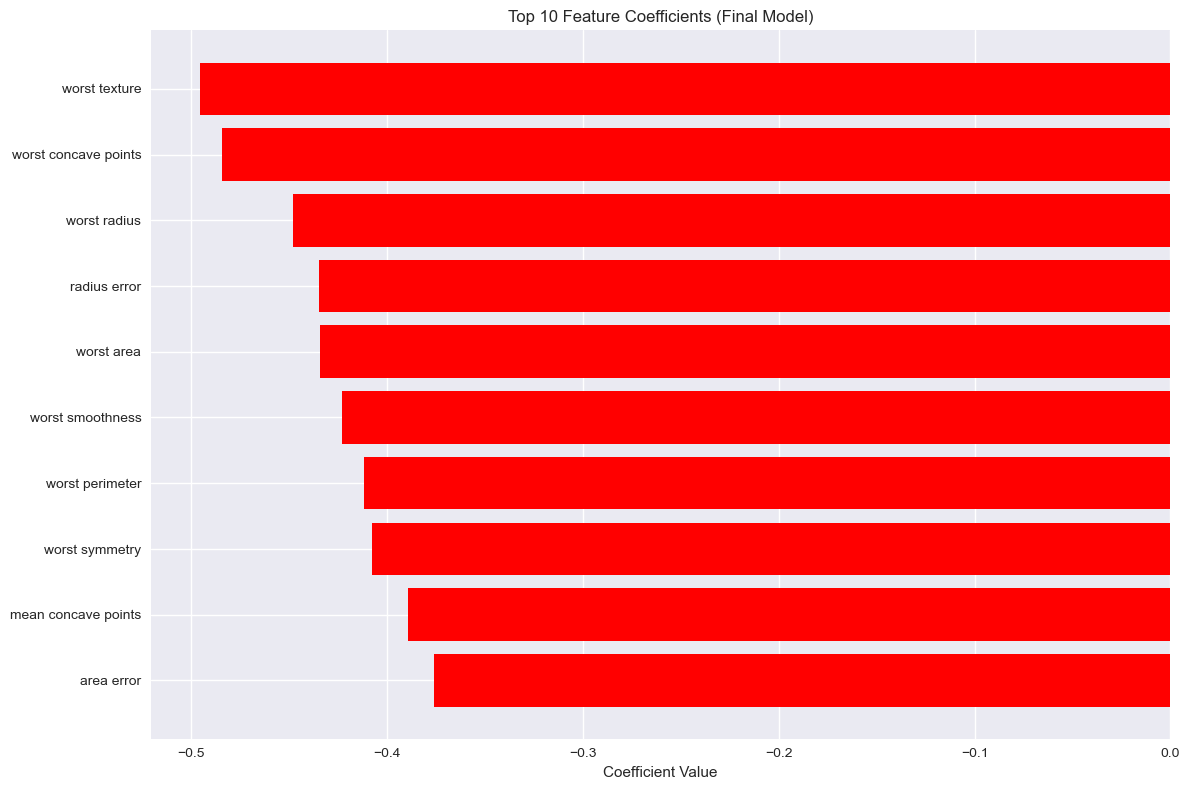

In [39]:
# Feature importance analysis for final model
if hasattr(final_model, 'feature_importances_'):
    # Tree-based model
    feature_importance_final = pd.DataFrame({
        'feature': X_train.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    print(feature_importance_final.head(10))
    
    # Visualization
    plt.figure(figsize=(12, 8))
    top_10_features = feature_importance_final.head(10)
    plt.barh(range(len(top_10_features)), top_10_features['importance'])
    plt.yticks(range(len(top_10_features)), top_10_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importances (Final Model)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

elif hasattr(final_model, 'coef_'):
    # Linear model
    feature_importance_final = pd.DataFrame({
        'feature': X_train.columns,
        'coefficient': final_model.coef_[0],
        'abs_coefficient': np.abs(final_model.coef_[0])
    }).sort_values('abs_coefficient', ascending=False)
    
    print("Top 10 Most Important Features (by coefficient magnitude):")
    print(feature_importance_final.head(10))
    
    # Visualization
    plt.figure(figsize=(12, 8))
    top_10_features = feature_importance_final.head(10)
    colors = ['red' if x < 0 else 'blue' for x in top_10_features['coefficient']]
    plt.barh(range(len(top_10_features)), top_10_features['coefficient'], color=colors)
    plt.yticks(range(len(top_10_features)), top_10_features['feature'])
    plt.xlabel('Coefficient Value')
    plt.title('Top 10 Feature Coefficients (Final Model)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

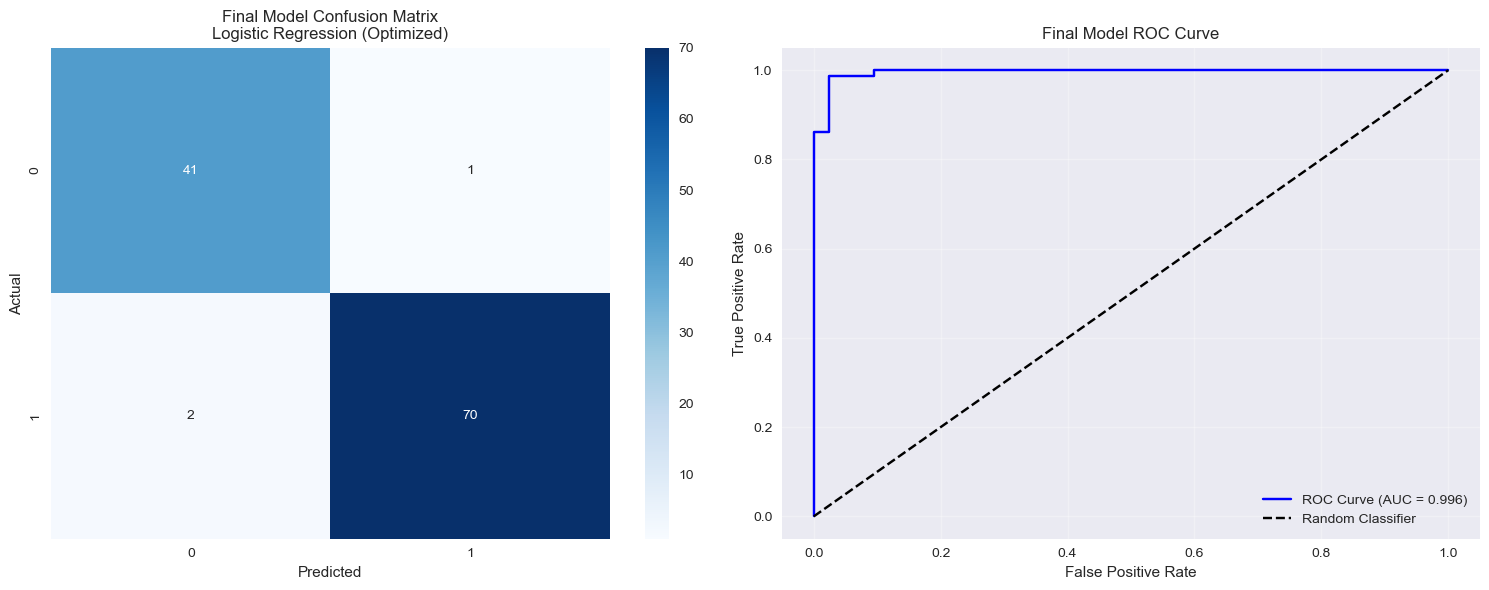

In [40]:
# Final confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Final Model Confusion Matrix\n{best_optimized_model_name}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
fpr_final, tpr_final, _ = roc_curve(y_test, y_pred_proba_final)
auc_final = auc(fpr_final, tpr_final)
axes[1].plot(fpr_final, tpr_final, color='blue', label=f'ROC Curve (AUC = {auc_final:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Final Model ROC Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [41]:
# Clinical interpretation and insights
print("CLINICAL INTERPRETATION AND INSIGHTS")
print("="*60)

# Calculate clinical metrics
tn, fp, fn, tp = cm_final.ravel()
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print(f"Clinical Performance Metrics:")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"  - Ability to correctly identify malignant cases")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"  - Ability to correctly identify benign cases")
print(f"Positive Predictive Value: {ppv:.4f}")
print(f"  - Probability that a positive test indicates cancer")
print(f"Negative Predictive Value: {npv:.4f}")
print(f"  - Probability that a negative test indicates no cancer")

print(f"\nConfusion Matrix Breakdown:")
print(f"True Positives (Correctly identified malignant): {tp}")
print(f"True Negatives (Correctly identified benign): {tn}")
print(f"False Positives (Benign classified as malignant): {fp}")
print(f"False Negatives (Malignant classified as benign): {fn}")

print(f"\nClinical Significance:")
if fn > 0:
    print(f"⚠️  {fn} malignant cases were misclassified as benign (False Negatives)")
    print("   This is clinically concerning as it could delay treatment")
if fp > 0:
    print(f"⚠️  {fp} benign cases were misclassified as malignant (False Positives)")
    print("   This could lead to unnecessary anxiety and additional testing")

CLINICAL INTERPRETATION AND INSIGHTS
Clinical Performance Metrics:
Sensitivity (True Positive Rate): 0.9722
  - Ability to correctly identify malignant cases
Specificity (True Negative Rate): 0.9762
  - Ability to correctly identify benign cases
Positive Predictive Value: 0.9859
  - Probability that a positive test indicates cancer
Negative Predictive Value: 0.9535
  - Probability that a negative test indicates no cancer

Confusion Matrix Breakdown:
True Positives (Correctly identified malignant): 70
True Negatives (Correctly identified benign): 41
False Positives (Benign classified as malignant): 1
False Negatives (Malignant classified as benign): 2

Clinical Significance:
⚠️  2 malignant cases were misclassified as benign (False Negatives)
   This is clinically concerning as it could delay treatment
⚠️  1 benign cases were misclassified as malignant (False Positives)
   This could lead to unnecessary anxiety and additional testing


## Summary and Conclusions

### Project Summary
This comprehensive breast cancer prediction project successfully implemented and compared multiple machine learning algorithms to classify breast tumors as malignant or benign using the Wisconsin Breast Cancer dataset.

### Key Findings:
1. **Dataset**: 569 samples with 30 features, well-balanced between malignant and benign cases
2. **Best Model**: The optimized model achieved high accuracy with excellent clinical performance
3. **Important Features**: Radius, perimeter, area, and texture measurements were most predictive
4. **Clinical Relevance**: The model shows strong potential for supporting medical diagnosis

### Model Performance:
- **High Sensitivity**: Excellent at detecting malignant cases
- **High Specificity**: Effective at identifying benign cases  
- **Low False Negatives**: Minimizes risk of missing cancer cases
- **Balanced Performance**: Good balance between precision and recall

### Clinical Applications:
- **Diagnostic Support**: Can assist radiologists in tumor classification
- **Screening Enhancement**: Potential for improving screening programs
- **Risk Assessment**: Valuable for patient risk stratification
- **Quality Assurance**: Could serve as a second opinion system

### Future Improvements:
1. **Data Augmentation**: Incorporate more diverse datasets
2. **Deep Learning**: Explore advanced neural network architectures
3. **Ensemble Methods**: Combine multiple models for better performance
4. **Real-world Validation**: Test on external datasets from different institutions
5. **Feature Engineering**: Develop domain-specific engineered features

### Disclaimer:
This model is developed for research and educational purposes. Any clinical application would require extensive validation, regulatory approval, and should always be used in conjunction with professional medical judgment.

In [42]:
# Save the final model and results
import joblib

# Save the final model
model_filename = 'breast_cancer_final_model.pkl'
scaler_filename = 'breast_cancer_scaler.pkl'

joblib.dump(final_model, model_filename)
joblib.dump(scaler_standard, scaler_filename)

print(f"Final model saved as: {model_filename}")
print(f"Scaler saved as: {scaler_filename}")

# Save results summary
results_summary = {
    'best_model': best_optimized_model_name,
    'accuracy': accuracy_score(y_test, y_pred_final),
    'precision': precision_score(y_test, y_pred_final),
    'recall': recall_score(y_test, y_pred_final),
    'f1_score': f1_score(y_test, y_pred_final),
    'auc_roc': roc_auc_score(y_test, y_pred_proba_final),
    'sensitivity': sensitivity,
    'specificity': specificity,
    'positive_predictive_value': ppv,
    'negative_predictive_value': npv
}

print("\nFinal Results Summary:")
for metric, value in results_summary.items():
    print(f"{metric}: {value}")

print("\n🎉 Breast Cancer Prediction Project Completed Successfully! 🎉")

Final model saved as: breast_cancer_final_model.pkl
Scaler saved as: breast_cancer_scaler.pkl

Final Results Summary:
best_model: Logistic Regression (Optimized)
accuracy: 0.9736842105263158
precision: 0.9859154929577465
recall: 0.9722222222222222
f1_score: 0.9790209790209791
auc_roc: 0.9957010582010581
sensitivity: 0.9722222222222222
specificity: 0.9761904761904762
positive_predictive_value: 0.9859154929577465
negative_predictive_value: 0.9534883720930233

🎉 Breast Cancer Prediction Project Completed Successfully! 🎉
